# **분류기 구현하기**

**구글 드라이브 마운트**

먼저, 구글 드라이브에 MNIST_digit159_classify.npz를 업로드하고, 이를 사용하기 위해 구글 드라이브를 마운트한다.

In [2]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


**데이터 로드 및 시각화(visualization)**

구글 드라이브에 저장된 MNIST 숫자 데이터를 로드하고, 학습 데이터와 테스트 데이터로 할당한 뒤 시각화 한다.

분류 문제에서는 데이터(x_train, x_test)와 함께 목표값(ground-truth)인 클래스 라벨(y_train, y_test)도 함께 주어져야 한다.

학습 데이터와 테스트 데이터는 각각 300개씩(각 클래스당 100개)의 데이터와 클래스 라벨로 구성되어 있다.

x_train 의 dimension (300, 784)
y_train 의 dimension (300,)
x_test 의 dimension (300, 784)
y_test 의 dimension (300,)


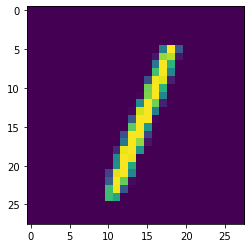

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# MNIST 데이터 불러오기 (3개의 클래스(1, 5, 9)로 구성된 28x28 크기의 데이터)
# 내 구글 드라이브의 MyColab폴더 안 Data폴더에 업로드된 npz 파일을 로드
npzfile = np.load('/content/gdrive/My Drive/MyColab/Data/MNIST_digit159_classify.npz')

# 학습 데이터와 테스트 데이터를 라벨과 함께 변수에 할당
x_train=npzfile['xtrain'] # 784차원의 학습 데이터
y_train=npzfile['ytrain'] # 학습 데이터에 대한 1차원의 클래스 라벨
x_test=npzfile['xtest'] # 784차원의 테스트 데이터
y_test=npzfile['ytest'] # 테스트 데이터에 대한 1차원의 클래스 라벨

# 데이터를 로드한 뒤에는 차원 수를 확인해야 한다.
print('x_train 의 dimension', x_train.shape)
print('y_train 의 dimension', y_train.shape)
print('x_test 의 dimension', x_test.shape)
print('y_test 의 dimension', y_test.shape)

# 샘플 이미지 시각화
X = np.array([np.reshape(t,(28,28)) for t in x_train]) / 255.0
plt.imshow(X[99,:,:])

**1. 최소거리 분류기 구현하기**

입력 데이터와 각 클래스의 평균 사이의 거리를 계산하여 최소 거리값을 가지는 클래스로 분류하는 최소거리 분류기를 구현해본다.

In [4]:
# 각 클래스에 대한 평균 계산
m = np.zeros((3,784)) # 계산된 평균값을 저장할 0값으로 초기화된 3x784 크기의 행렬 생성
m[0,:] = np.mean(x_train[0:100,0:784], axis = 0)
m[1,:] = np.mean(x_train[100:200,0:784], axis = 0)
m[2,:] = np.mean(x_train[200:300,0:784], axis = 0)

# 테스트 데이터와 각 클래스의 평균과의 거리 계산하기
d1 = np.zeros((3,1))
y_out = np.zeros(300)
for i in range(300):
  t = x_test[i,:]
  for k in range(3):
    d1[k,0] = np.linalg.norm(t - m[k,:]) # np.linalg.norm 함수는 default가 l2-norm이다.
    y_out[i] = np.argmin(d1) + 1  # 테스트 데이터에 대한 예측값 
print(y_out, '\n')

# 테스트 데이터에 대한 성능 측정
print('Classification error:')
print(np.sum(np.abs(y_out - y_test) > 0) / 300, '\n')
print('Classification rate:')
print(np.sum(np.abs(y_out - y_test) == 0) / 300,'\n')

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 1. 2. 1. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 3. 2. 2. 2. 2. 2. 2. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 1. 2. 2. 2. 2. 3. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 1. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 2. 3. 3. 3. 3. 3. 3. 1. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 2. 3. 1.] 

Classification error:
0.05 

Classification rate:
0.95 



**2. 사이킷런(scikit-learn)을 사용한 베이즈 분류기 구현하기**

베이즈 분류기를 직접 구현할 수도 있지만 파이썬에서는 사이킷런 라이브러리로부터 미리 구현된 모듈을 호출하여 사용할 수 있다.

사이킷런이 제공하는 나이브 베이즈 분류기는 여러 가지가 있으며, 여기에서는 가우시안, 베르누이, 다항분포 세 가지만 사용해 본다.

가우시안 베이즈 분류기는 데이터가 연속적인 값을 가질 때 많이 사용되며, 베르누이와 다항분포 베이즈 분류기는 주로 텍스트 분류에 많이 사용된다.



In [5]:
# 가우시안 나이브 베이즈
from sklearn.naive_bayes import GaussianNB

model = GaussianNB() # 분류 모델 생성
# 아래와 같이 파라미터로 선험확률을 다르게 주어 모델을 생성할 수 있다.
# model = GaussianNB(priors = [10/100, 20/100, 70/100])

# model의 파라미터를 가져오고 싶다면 get_params 함수 사용
GNB_params = model.get_params().items() # default값으로 설정된 파라미터 확인
print(GNB_params, '\n')

# fit 함수를 사용하여 학습 데이터로 모델을 학습
model.fit(x_train,y_train) 

# predict 함수로 학습된 모델에 테스트 데이터를 입력하여 예측값을 얻음
y_GNB = model.predict(x_test) 
print(y_GNB, '\n')

# 테스트 데이터에 대한 성능 측정
print('Classification error:')
print(np.sum(np.abs(y_GNB - y_test) > 0) / 300, '\n')
print('Classification rate:')
print(np.sum(np.abs(y_GNB - y_test) == 0) / 300, '\n')

dict_items([('priors', None), ('var_smoothing', 1e-09)]) 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 3 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 2 1 1 1 1 1 1 1 1 1 3 2 1 1 1 1 1 1 3 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 3 2 2 2 2 2 2 2 2 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 2 3 2] 

Classification error:
0.07333333333333333 

Classification rate:
0.9266666666666666 



아래 코드를 통해 confusion matrix를 생성하여 각 클래스로 분류된 데이터의 개수를 확인해 볼 수 있다.

결과로 표시된 Confusion matrix의 첫 행인 [90, 7, 3]은 첫 번째 클래스를 목표값으로 가지는 100개의 데이터가 첫 번째 클래스로 90개, 두 번째 클래스로 7개, 세 번째 클래스로 3개 분류되었음을 나타낸다.

In [ ]:
# Confusion matrix를 통해 각 클래스로 분류된 데이터의 개수 확인
from sklearn.metrics import confusion_matrix  
confusion_matrix(y_test, y_GNB)

array([[90,  7,  3],
       [ 0, 94,  6],
       [ 0,  6, 94]])

In [6]:
# 베르누이 나이브 베이즈
from sklearn.naive_bayes import BernoulliNB

model2 = BernoulliNB()
model2.fit(x_train, y_train) 

y_BNB = model2.predict(x_test) 

# 테스트 데이터에 대한 성능 측정
print('Classification error:')
print(np.sum(np.abs(y_BNB - y_test) > 0) / 300, '\n')
print('Classification rate:')
print(np.sum(np.abs(y_BNB - y_test) == 0) / 300, '\n')


Classification error:
0.04666666666666667 

Classification rate:
0.9533333333333334 



In [7]:
# 다항분포 나이브 베이즈
from sklearn.naive_bayes import MultinomialNB

model3 = MultinomialNB()
model3.fit(x_train, y_train) 

y_MNB = model3.predict(x_test) 

# 테스트 데이터에 대한 성능 측정
print('Classification error:')
print(np.sum(np.abs(y_MNB - y_test) > 0) / 300, '\n')
print('Classification rate:')
print(np.sum(np.abs(y_MNB - y_test) == 0) / 300, '\n')


Classification error:
0.05 

Classification rate:
0.95 



**3. K-최근접이웃 분류기 구현하기**

사이킷런으로부터 K-NN 분류기를 호출하여 MNIST 데이터를 분류해 본다.

먼저, K가 10인 경우의 K-NN 분류기를 구현해 보고, K값에 따른 성능 변화를 살펴본다.

In [ ]:
from scipy.spatial import distance
from sklearn.neighbors import KNeighborsClassifier

K = 10      # neighbor 개수 정하기

# 모델 생성 및 학습
model = KNeighborsClassifier(n_neighbors = K)
model.fit(x_train,y_train)

# 테스트 데이터에 대한 예측값 획득
y_KNN = model.predict(x_test)
print(y_KNN, '\n')

# 테스트 데이터에 대한 성능 측정
print('Classification error:')
print(np.sum(np.abs(y_KNN - y_test) > 0) / 300, '\n')
print('Classification rate:')
print(np.sum(np.abs(y_KNN - y_test) == 0) / 300, '\n')

# 분류율은 score 함수로도 구할 수 있다.
acc = model.score(x_test, y_test)
print(acc)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 3
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 1 2 2 2 2 3 2 2 2 2 2 2 3 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 2 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 1] 

Classification error:
0.03333333333333333 

Classification rate:
0.9666666666666667 

0.9666666666666667


For문을 활용하여 K-NN 분류기의 K값에 따른 분류 성능 변화를 관찰한다. 

In [ ]:
# neighbor의 개수를 5, 10, 15, 20, 25, 30 으로 설정한 경우의 분류율 비교하기
K_values = [5, 10, 15, 20, 25, 30]
for k in K_values:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(x_train,y_train)
    y_KNN = model.predict(x_test)
    print('Classification rate with k =', k)
    print(np.sum(np.abs(y_KNN - y_test) == 0) / 300, '\n')
    

Classification rate with k = 5
0.97 

Classification rate with k = 10
0.9666666666666667 

Classification rate with k = 15
0.9666666666666667 

Classification rate with k = 20
0.9533333333333334 

Classification rate with k = 25
0.9466666666666667 

Classification rate with k = 30
0.9366666666666666 

